In [1]:
import pykeops

pykeops.test_numpy_bindings()

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode
pyKeOps with numpy bindings is working!


In [2]:
import torch as t
from pykeops.torch import LazyTensor
from pykeops.torch.utils import torch_kernel

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sonar import utils
tissue_matrix = np.load('/dh-projects/ag-ishaque/analysis/tiesmeys/src/sonar/test/ISS-pancreas/data/sample_matrices.npz')['sample_'+str(1)]
rescaled = utils.rescale_topographic_tensor(tissue_matrix, scaling_factor=0.1).numpy()

In [16]:
from sonar import sonar, utils
kernel_matrix = sonar._get_kernels(30,1,1,)

kernels_lazy = LazyTensor(t.tensor(kernel_matrix[0]).half()[:,None,:])
tissues_lazy = LazyTensor(t.tensor(tissue_matrix).half()[:,:,None])


In [27]:
# from scipy import fft as sp_fft

# kernels,radii = sonar._get_kernels(30,1,1,)

# kernels = t.tensor(kernels).half()
# kernel_size = kernels.shape[1:]
# map_size = tissue_matrix.shape[1:]

# shape = [kernel_size[i]+map_size[i] for i in range(2)]
# fshape = [sp_fft.next_fast_len(shape[a], True) for a in [0,1]]

# kernels_fft = (t.fft.rfftn(kernels.float(), fshape,dim=[1,2]))
# tissue_fft = (t.fft.rfftn(t.tensor(tissue_matrix).float(), fshape,dim=[1,2]))

In [5]:
from pykeops.torch import Vi, Vj, Pm
# from pykeops.common import  Abs, Clamp
from pykeops.torch.utils import torch_kernel

kernel_function =  lambda xc, yc, radius: 1-((radius-(Vi(xc)-Vj(yc)).norm2()).abs()).clamp(0,1)

# X,Y = t.meshgrid(t.linspace(-15,15,30),t.linspace(-15,15,30))
# b = t.zeros_like(X)
# b[15,15] = 1

# signal = t.vstack([X.flatten(),Y.flatten()]).T.contiguous()
# b = b.flatten()[:,None]

In [14]:
kernel_function =  lambda xc, yc, radius: 1-((radius-(LazyTensor(xc)-LazyTensor(yc)).norm2()).abs()).clamp(0,1)

g_pykeops = kernel_function(signal, signal, 2) #@ (b)
g_pykeops.shape

ValueError: 'axis' parameter should not be given when 'x' is a 3D tensor.

In [13]:
X,Y = t.meshgrid(t.arange(rescaled.shape[1]),t.arange(rescaled.shape[2]))
signal = t.vstack([X.flatten(),Y.flatten()]).T.contiguous().float()[None]

b = t.tensor(rescaled[0].flatten()[:,None]).float()


In [388]:
signal.shape, b.shape

(torch.Size([46565480, 2]), torch.Size([46565480, 1]))

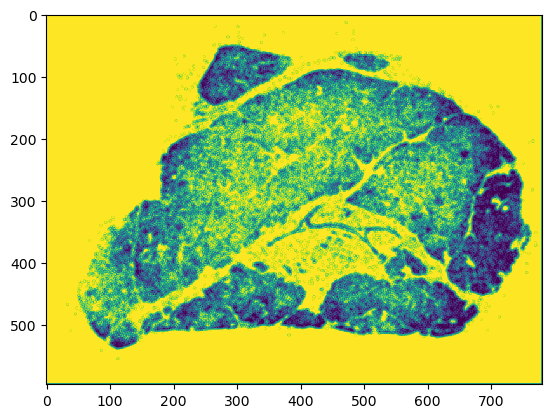

In [7]:
plt.imshow(g_pykeops.reshape(X.shape),aspect='auto',interpolation='none')

# plt.plot(g_pykeops[15::30])